# <div style = 'background-color:#50474E'> <center><font color='#8FAD88'>Análisis crediticio y gestión del riesgo de crédito</div>
---

 En el negocio financiero, el crédito es un activo que genera ingresos, pero también riesgos. La gestión del riesgo crediticio busca cuantificar y mitigar las pérdidas derivadas del incumplimiento de los clientes, utilizando modelos estadísticos y métricas regulatorias.

En el marco de los acuerdos de Basilea II y III, el riesgo crediticio se mide a través de tres componentes fundamentales: [PD], [LGD] y [EAD], que permiten estimar la Pérdida Esperada [Expected Loss]. Luego se complementa con ejercicios de Stress Testing para medir la capacidad del portafolio de préstamos o inversiones de un banco de resistir shocks adversos sin generar pérdidas críticas o incumplimientos regulatorios.

A qué se refieren las siglas mencionadas antes?
#### [PD] Probability of Default [Probabilidad de Incumplimiento]

Es La probabilidad de que un cliente o contraparte incurra en default dentro de un horizonte temporal (normalmente 12 meses). Se estima con modelos estadísticos: Regresión logística, árboles de decisión, random forest, etc. Se obtiene la informacion de historial de pagos del cliente, información crediticia externa y estados financieros. Se mide por segmentos o rating (clasificación de 0,5% para AAA; 10% para BB).

#### [LGD] Loss Given Default [Pérdida Dada el Incumplimiento]

Proporción del saldo expuesto que se pierde una vez ocurrido el default, después de tener en cuenta las posibles recuperaciones (cobros judiciales, cobros de garantías, etc.). Este concepto es influenciado por el tipo de garantía (hipoteca, prendaria, personal), el tiempo y costos de recuperación de los creditos, por ultimo tambien por los costos de recuperación.

Fórmula general:
$$ 𝐿𝐺𝐷 = 1−\frac{Recuperaciones Netas} {EAD}$$ 

Ejemplo:

Si un cliente debe 100.000 y se recuperan 30.000: 

$$ LGD=1−\frac{100.000} {30.000}=70\%$$


#### [EAD] Exposure at Default [Exposición al Momento del Default]

Es el monto total expuesto al momento del incumplimiento. Cuando se habla de prestamos seria el saldo insoluto, en lineas de credito o tarjetas es el saldo utilizado + un % del no utilizado.

Formula general:

$$ EAD = \text{Monto otorgado} \times \text{Factor de utilización} $$

Ejemplo:

Línea aprobada 100.000, utilizado 60.000. Se estima que al default usará un 50% de lo no utilizado.

$$ 𝐸𝐴𝐷=60.000+0,5×40.000=80.000$$

#### [EL] Expected Loss [Pérdida Esperada]

Es una métrica central en riesgo crediticio, estima la pérdida promedio esperada por incumplimiento de los clientes. Es la base para calcular provisiones contables y determinar el capital económico necesario para absorber pérdidas esperadas.

$$ 𝐸L = PD × LGD × EAD $$

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:#50474E'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore") # Filtrar avisos

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("AnalisisRiesgoCrediticio.csv")

In [3]:
df.sample(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
174,174,26,male,2,own,little,little,3414,21,education,bad
630,630,28,female,2,own,little,little,3660,24,radio/TV,good
996,996,40,male,3,own,little,little,3857,30,car,good
434,434,25,male,2,own,little,little,2136,9,furniture/equipment,good
908,908,46,female,1,own,little,NaN,3594,15,car,good
232,232,35,male,2,own,moderate,NaN,2141,12,radio/TV,good
912,912,25,female,2,own,NaN,moderate,2991,30,radio/TV,good
843,843,50,male,2,own,little,NaN,1559,24,business,good
744,744,30,male,3,own,NaN,little,14179,39,furniture/equipment,good
26,26,39,male,1,own,little,NaN,426,6,radio/TV,good


In [4]:
df.info() # Información general del set de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df=df.drop("Unnamed: 0", axis=1) # axis=1 borra columna, axis=0 borra fila

In [6]:
# Renombro columnas.
df.columns = ['Edad', 'Sexo', 'Trabajo', 'Casa', 'Caja de Ahorro', 'Cuenta Corriente', 'Monto Credito', 'Duration', 'Destino', 'Riesgo']

In [7]:
df.sample(10)

,Edad,Sexo,Trabajo,Casa,Caja de Ahorro,Cuenta Corriente,Monto Credito,Duration,Destino,Riesgo
904,36,male,3,own,little,NaN,1278,24,radio/TV,good
276,26,female,2,own,little,NaN,2404,18,radio/TV,good
657,37,male,2,own,NaN,NaN,10222,48,radio/TV,good
924,55,male,2,own,little,little,6872,24,furniture/equipment,bad
875,40,female,2,own,rich,moderate,1322,11,car,good
244,35,female,1,own,quite rich,NaN,3447,12,education,good
382,25,female,2,rent,NaN,NaN,1283,22,car,good
243,27,female,2,own,little,NaN,1185,12,business,good
613,22,female,2,rent,little,little,3632,24,car,good
250,39,female,1,own,rich,little,666,6,car,good


In [8]:
df.isnull().sum() # Ver cantidad de valores nulos en cada campo.

Edad                  0
Sexo                  0
Trabajo               0
Casa                  0
Caja de Ahorro      183
Cuenta Corriente    394
Monto Credito         0
Duration              0
Destino               0
Riesgo                0
dtype: int64

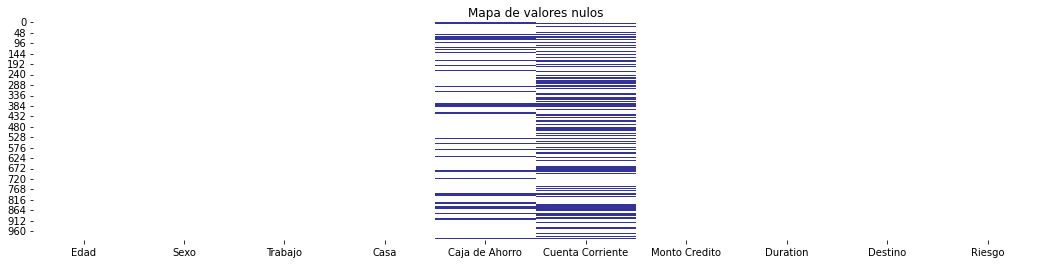

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(), cbar=False, cmap="terrain_r")
plt.title("Mapa de valores nulos")
plt.show()


In [10]:
df['Caja de Ahorro'].value_counts() # Para ver que valores tiene este campo.

Caja de Ahorro
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [11]:
df['Cuenta Corriente'].value_counts()

Cuenta Corriente
little      274
moderate    269
rich         63
Name: count, dtype: int64

Dado que las columnas “Caja de Ahorro” y “Cuenta Corriente” contienen valores de tipo texto, no resulta apropiado reemplazar los valores nulos mediante medidas estadísticas como la media o la mediana. En consecuencia, para evitar la pérdida de información y no eliminar registros, se decidió imputar los valores faltantes de una columna utilizando los valores existentes en la otra, siempre que fueran similares o equivalentes. Este procedimiento permitió completar una gran parte de los datos faltantes, reduciendo la cantidad de filas con valores nulos en ambas columnas a 99, las cuales fueron tratadas posteriormente mediante otro método de imputación.

In [12]:
# Reemplazo si en Cuenta Corriente tengo el valor ejemplo "little", voy al campo Caja de Ahorro y relleno con ese valor.
df.loc[df['Caja de Ahorro'].isnull() & (df['Cuenta Corriente']=='little'), 'Caja de Ahorro'] = 'little'
df.loc[df['Caja de Ahorro'].isnull() & (df['Cuenta Corriente']=='moderate'), 'Caja de Ahorro'] = 'moderate'
df.loc[df['Caja de Ahorro'].isnull() & (df['Cuenta Corriente']=='rich'), 'Caja de Ahorro'] = 'rich'
# Igualmente reemplazo los valores aca.
df.loc[df['Cuenta Corriente'].isnull() & (df['Caja de Ahorro']=='little'), 'Cuenta Corriente'] = 'little'
df.loc[df['Cuenta Corriente'].isnull() & (df['Caja de Ahorro']=='moderate'), 'Cuenta Corriente'] = 'moderate'
df.loc[df['Cuenta Corriente'].isnull() & (df['Caja de Ahorro']=='rich'), 'Cuenta Corriente'] = 'rich'
df.loc[df['Cuenta Corriente'].isnull() & (df['Caja de Ahorro']=='quite rich'), 'Cuenta Corriente'] = 'rich'

In [13]:
# Para ver como esta compuesto este campo. Utilizaré info del mismo como guia para rellenar las columnas con valores faltantes. 
df['Casa'].value_counts()

Casa
own     713
rent    179
free    108
Name: count, dtype: int64

Para rellenar la regla que aplicaré se basa en la premisa de que los clientes que poseen casa propia suelen tener una mayor solvencia económica, por lo que es razonable esperar que presenten valores más altos en Cuenta Corriente y Caja de Ahorro y asi con los otros valores.

In [14]:
# Partiendo de los valores del campo "Casa" si por ejemplo el valor es "Own" la sentencia establecera un valor "quiterich" en la columna "Caja de Ahorro"
df.loc[df['Caja de Ahorro'].isnull() & (df['Casa']=='own'), 'Caja de Ahorro'] = 'quiterich'
df.loc[df['Caja de Ahorro'].isnull() & (df['Casa']=='rent'), 'Caja de Ahorro'] = 'moderate'
df.loc[df['Caja de Ahorro'].isnull() & (df['Casa']=='free'), 'Caja de Ahorro'] = 'moderate'

df.loc[df['Cuenta Corriente'].isnull() & (df['Casa']=='own'), 'Cuenta Corriente'] = 'rich'
df.loc[df['Cuenta Corriente'].isnull() & (df['Casa']=='rent'), 'Cuenta Corriente'] = 'moderate'
df.loc[df['Cuenta Corriente'].isnull() & (df['Casa']=='free'), 'Cuenta Corriente'] = 'moderate'

In [15]:
df.isnull().sum() # Comprobando que no deberia quedar ningun valor nulo y a la vez se evito borrar esas filas para ello, conservando la mayoria de los datos.

Edad                0
Sexo                0
Trabajo             0
Casa                0
Caja de Ahorro      0
Cuenta Corriente    0
Monto Credito       0
Duration            0
Destino             0
Riesgo              0
dtype: int64

## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

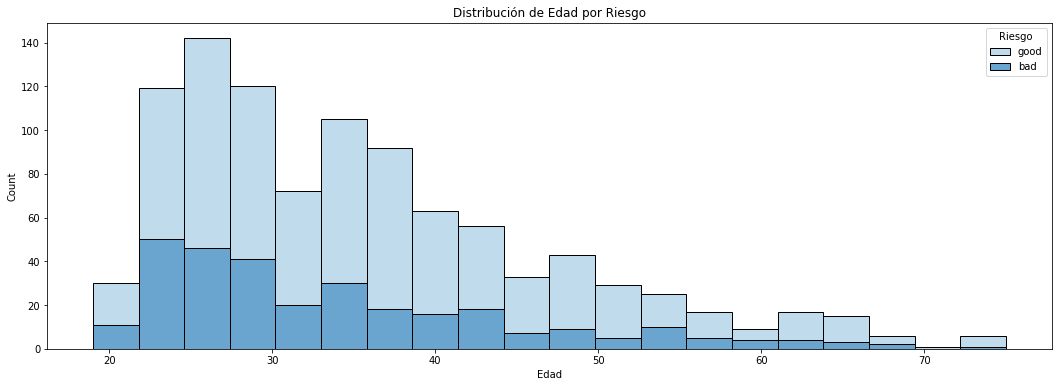

In [16]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Edad', hue='Riesgo', multiple='stack', palette="Blues", bins=20)
plt.title("Distribución de Edad por Riesgo")
plt.show()

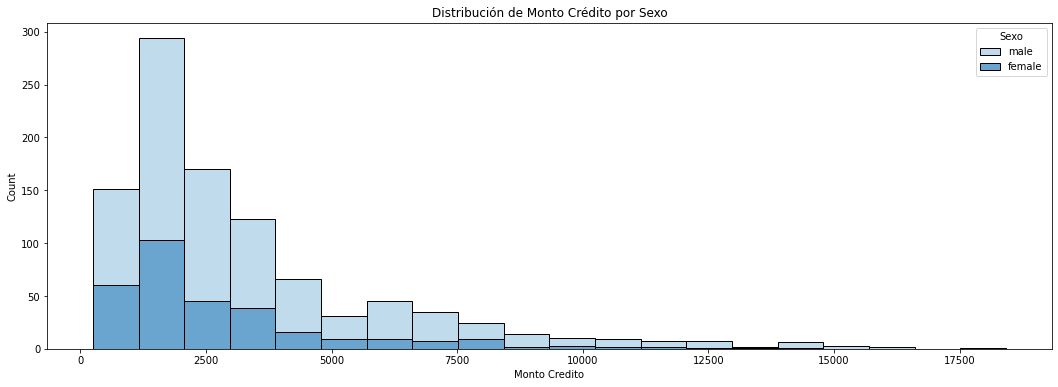

In [17]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Monto Credito', hue='Sexo', multiple='stack', palette="Blues", bins=20)
plt.title("Distribución de Monto Crédito por Sexo")
plt.show()

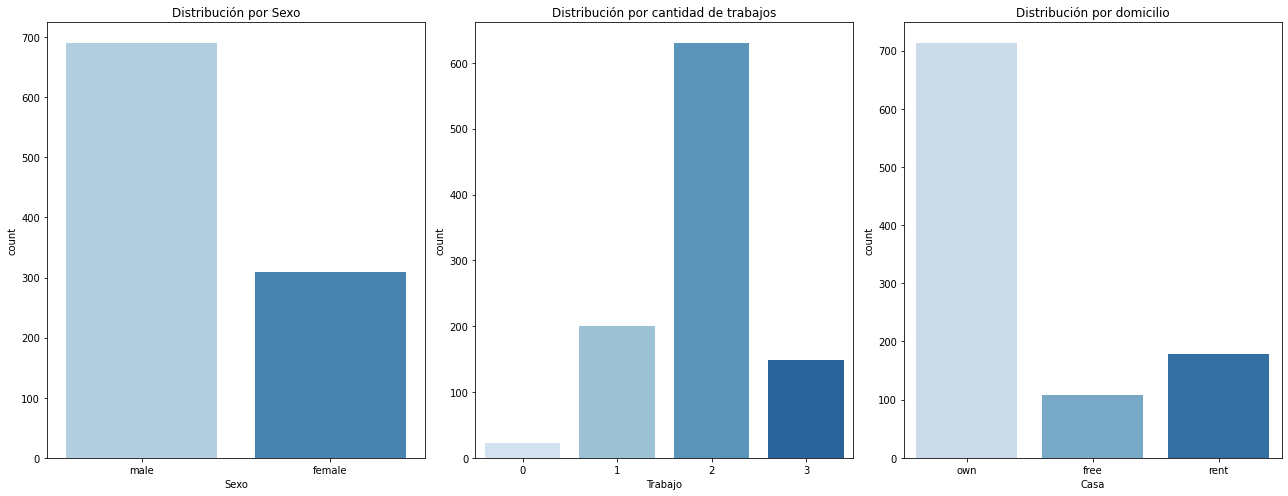

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Para mostrar 1 fila y 3 columnas

sns.countplot(x='Sexo', data=df, ax=axes[0], palette="Blues") # Gráfico País
axes[0].set_title('Distribución por Sexo')

sns.countplot(x='Trabajo', data=df, ax=axes[1], palette="Blues") # Gráfico Género
axes[1].set_title('Distribución por cantidad de trabajos')

sns.countplot(x='Casa', data=df, ax=axes[2], palette="Blues") # Gráfico Activo
axes[2].set_title('Distribución por domicilio')

plt.tight_layout()  # ajusta espacios
plt.show()

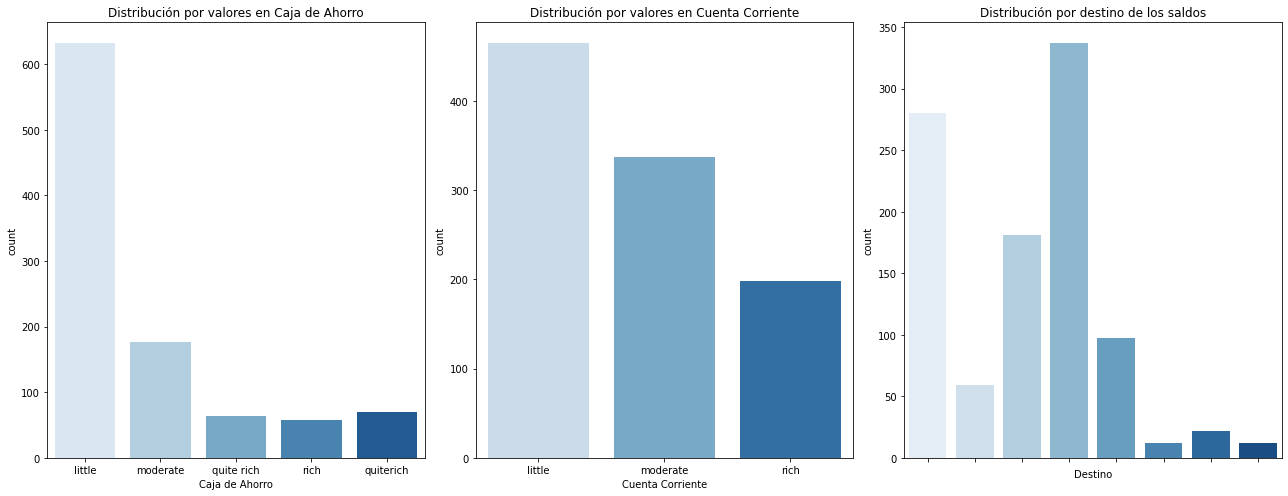

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Para mostrar 1 fila y 3 columnas

sns.countplot(x='Caja de Ahorro', data=df, ax=axes[0], palette="Blues") # Gráfico País
axes[0].set_title('Distribución por valores en Caja de Ahorro')

sns.countplot(x='Cuenta Corriente', data=df, ax=axes[1], palette="Blues") # Gráfico Género
axes[1].set_title('Distribución por valores en Cuenta Corriente')

sns.countplot(x='Destino', data=df, ax=axes[2], palette="Blues") # Gráfico Activo
axes[2].set_title('Distribución por destino de los saldos')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right') # Para ver las etiquetas en diagonal

plt.tight_layout()  # ajusta espacios
plt.show()

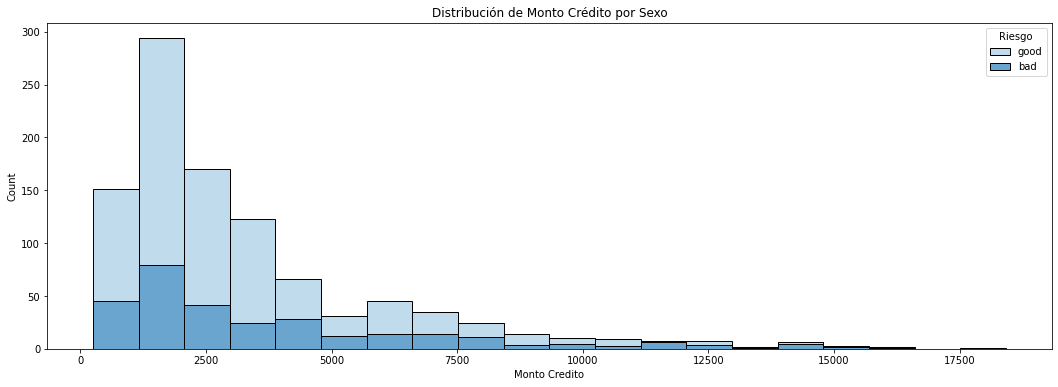

In [20]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Monto Credito', hue='Riesgo', multiple='stack', palette="Blues", bins=20)
plt.title("Distribución de Monto Crédito por Sexo")
plt.show()

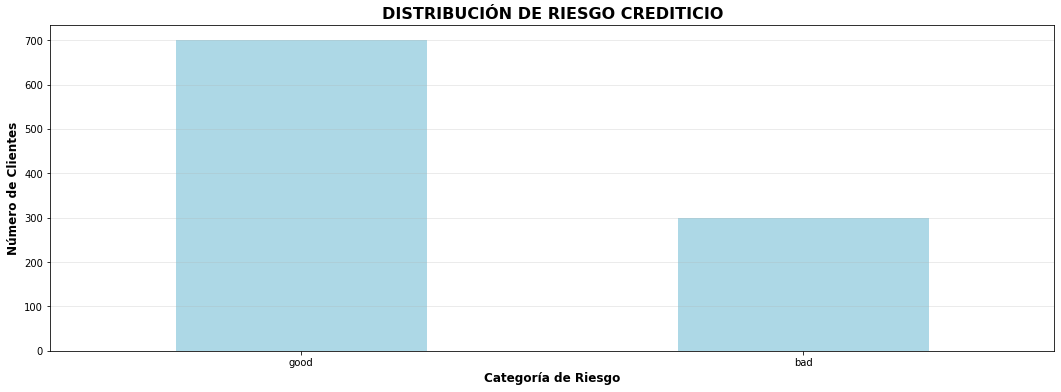

In [21]:
plt.figure(figsize=(18, 6))
df['Riesgo'].value_counts().plot(kind='bar', color=['lightblue', 'lightblue'])
plt.title('DISTRIBUCIÓN DE RIESGO CREDITICIO', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Riesgo', fontsize=12, fontweight='bold')
plt.ylabel('Número de Clientes', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [22]:
df['Riesgo'].value_counts(normalize=True)

Riesgo
good    0.7
bad     0.3
Name: proportion, dtype: float64

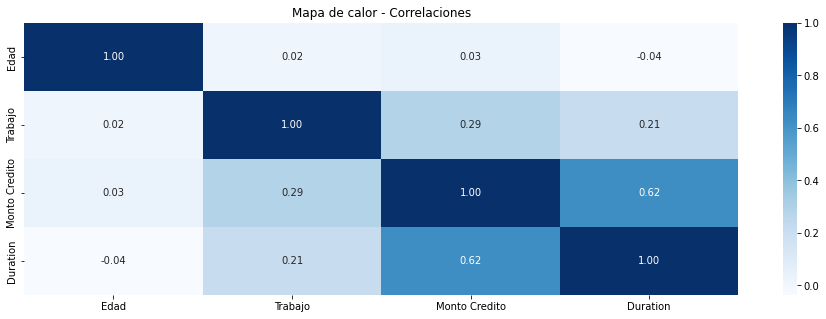

In [23]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mapa de calor - Correlaciones')
plt.show()

In [24]:
df.columns

Index(['Edad', 'Sexo', 'Trabajo', 'Casa', 'Caja de Ahorro', 'Cuenta Corriente',
       'Monto Credito', 'Duration', 'Destino', 'Riesgo'],
      dtype='object')

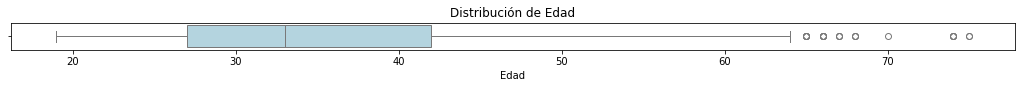

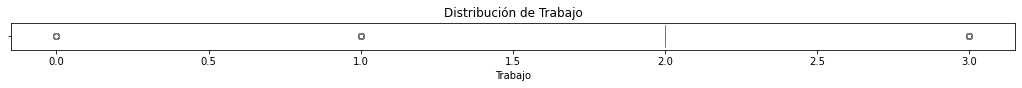

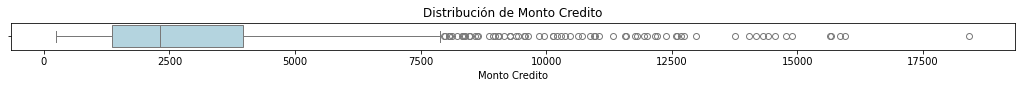

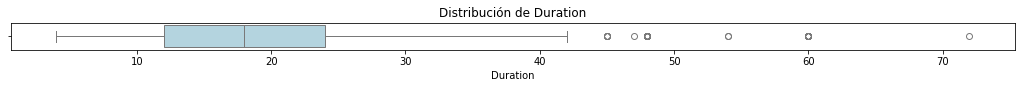

In [25]:
for col in ['Edad', 'Trabajo', 'Monto Credito', 'Duration']:
    plt.figure(figsize=(18, 0.5))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Distribución de {col}")
    plt.show()

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

El objetivo central de este análisis es predecir la probabilidad de que un cliente incumpla sus obligaciones crediticias, también conocida como Probabilidad de Default (PD). Esta predicción se realiza utilizando datos históricos de préstamos, incluyendo información tanto del perfil del cliente (edad, ingresos, historial crediticio, nivel educativo, entre otros) como de las características del préstamo otorgado (monto, plazo, tasa de interés, tipo de garantía, etc.).

Al estimar la PD, se busca cuantificar de manera precisa el riesgo asociado a cada cliente, lo que permite a las instituciones financieras tomar decisiones informadas sobre otorgamiento de crédito, límites de exposición y estrategias de mitigación de riesgo. Este análisis no solo tiene un enfoque de predicción, sino también un componente gestión de riesgo, ya que sirve como base para calcular otras métricas fundamentales como la Pérdida Esperada (Expected Loss [EL]).

En términos de análisis de datos, este objetivo implica desarrollar modelos de machine learning que puedan capturar patrones complejos en el comportamiento de pago de los clientes, identificar señales tempranas de riesgo y proporcionar probabilidades calibradas de incumplimiento, en lugar de una simple clasificación binaria. Esto es fundamental en un contexto bancario moderno, donde la gestión de riesgos debe ser predictiva y basada en evidencia


In [26]:
df.sample(3)


,Edad,Sexo,Trabajo,Casa,Caja de Ahorro,Cuenta Corriente,Monto Credito,Duration,Destino,Riesgo
780,25,male,2,own,little,moderate,4933,39,radio/TV,bad
499,28,male,2,own,moderate,rich,1323,6,car,good
820,27,male,2,own,little,little,1101,12,car,good


Ninguno de los modelos a utilizar admite variables categoricas o texto por lo que primero procedo a transformarlas en valores numéricos siguiendo diferentes procesos de acuerdo a lo que necesite en cada campo.

In [27]:
df['Sexo'] = df['Sexo'].map({'female': 0, 'male': 1}) # Convierto los valores en 0 (mujer) y 1 (hombre).
df['Riesgo'] = df['Riesgo'].map({'bad': 0, 'good': 1}) # Convierto los valores en 0 (malo) y 1 (bueno).

En la siguiente columna a transformar, asigno estos valores de acuerdo a su importancia:
- Propietario (own = 2): representa mayor estabilidad y capacidad patrimonial.
- Gratis (free = 1): intermedio; no tiene gastos de vivienda, pero tampoco patrimonio.
- Alquila (rent = 0): implica una obligación mensual fija, por lo tanto más riesgo.

In [28]:
map_Tipo_Casa = {'own': 2, 'free': 0, 'rent': 1,} # Mapeo de los valores que asigno.
df['Casa'] = df['Casa'].map(map_Tipo_Casa)

Las columnas de Caja de Ahorro y Cuenta Corriente tambien les determino un valor numerico en orden de acuerdo a la importancia de cada valor, siguiendo los lineamientos para el campo "Caja de Ahorro":

- little = 0        
- moderate = 1
- quite rich  = 2
- rich = 3

Y en la columna "Cuenta Corriente" los siguientes:

- little = 0        
- moderate = 1
- rich = 2    

In [29]:
df["Caja de Ahorro"].value_counts()

Caja de Ahorro
little        632
moderate      177
quiterich      70
quite rich     63
rich           58
Name: count, dtype: int64

In [30]:
map_CajaAh = {'little': 0, 'moderate': 1, 'quiterich': 2, 'quite rich': 2, 'rich': 3} # Mapeo de los valores que asigno.
df['Caja de Ahorro'] = df['Caja de Ahorro'].map(map_CajaAh)

map_CtaCte = {'little': 0, 'moderate': 1, 'rich': 2} # Mapeo de los valores que asigno.
df['Cuenta Corriente'] = df['Cuenta Corriente'].map(map_CtaCte)

In [31]:
df.sample()

,Edad,Sexo,Trabajo,Casa,Caja de Ahorro,Cuenta Corriente,Monto Credito,Duration,Destino,Riesgo
833,42,0,2,2,1,1,5084,24,radio/TV,1


Por último esta el campo "Destino", que desde un punto de vista clásico de riesgo crediticio puedo establecer:
- Bienes duraderos o esenciales (auto, vivienda, electrodomésticos) suelen tener menor riesgo crediticio porque tienen un valor de garantía con el cual responder eventualmente.
- Gastos de consumo o no esenciales (vacaciones, educación, otros) implican un mayor riesgo ya que no hay un activo que respalde el préstamo ante un impago.
- Créditos comerciales o de negocio pueden tener riesgo medio-alto dependiendo de la estabilidad del negocio.

In [32]:
df['Destino'].value_counts()

Destino
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [33]:
map_destino = {
    'car': 0,
    'furniture/equipment': 1,
    'radio/TV': 2,
    'domestic appliances': 2,
    'repairs': 3,
    'business': 4,
    'education': 5,
    'vacation/others': 6
}

df['Destino'] = df['Destino'].map(map_destino)

In [34]:
# El set de datos quedaría así convertido todo a valores numéricos.
df.sample(3)

,Edad,Sexo,Trabajo,Casa,Caja de Ahorro,Cuenta Corriente,Monto Credito,Duration,Destino,Riesgo
655,22,1,2,0,0,0,3973,14,0,1
369,40,0,2,1,0,1,3001,18,1,1
472,28,1,1,2,0,0,654,9,0,0


## ❑ Regresión Logística

In [35]:
# Procedo a escalar los valores para que todas las variables tengan similar importancia.
X = df.drop(columns=['Riesgo'])
y = df['Riesgo']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42) # Aqui balanceo las clases

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

In [40]:
# Acá estoy ajustando el umbral de decisión que por defecto el modelo usa 0.5. Al bajar a 0.3 mas obvservaciones se clasifican como 1.
y_prob = lr.predict_proba(X_test)[:, 1]

threshold = 0.3  
y_pred = (y_prob >= threshold).astype(int)

Accuracy: 0.7233333333333334
Recall: 0.9380952380952381
AUC: 0.6824338624338625

Matriz de confusión:
 [[ 20  70]
 [ 13 197]]



<Figure size 576x432 with 0 Axes>

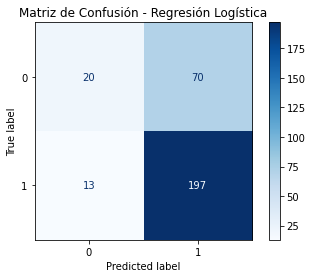

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print()

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


Se obtuvo un resultado, pero aplico tecnica de SMOTE (genera muestras sinteticas)

In [42]:
from imblearn.over_sampling import SMOTE # Importo SMOTE

In [43]:
sm = SMOTE(random_state=10)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Distribución original:", y_train.value_counts())
print("Distribución después de SMOTE:", pd.Series(y_train_bal).value_counts())

Distribución original: Riesgo
1    490
0    210
Name: count, dtype: int64
Distribución después de SMOTE: Riesgo
1    490
0    490
Name: count, dtype: int64


In [44]:
lr_bal = LogisticRegression(max_iter=5000, random_state=42)
lr_bal.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=5000, random_state=42)

In [45]:
y_pred = lr_bal.predict(X_test)
y_prob = lr_bal.predict_proba(X_test)[:, 1]

In [46]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6733333333333333
Recall: 0.7428571428571429
AUC: 0.6691005291005292

Matriz de confusión:
 [[ 46  44]
 [ 54 156]]


Costo de los errores en un Scoring Crediticio: En el scoring crediticio, cada tipo de error tiene implicaciones financieras directas para la institución. El objetivo no es simplemente maximizar la precisión, sino minimizar las pérdidas económicas y maximizar la rentabilidad del portafolio crediticio.

| Tipo de Error | Descripción | Costo para el Banco | Impacto |
|---------------|-------------|---------------------|---------|
| **Falso Negativo** | Cliente malo → Aprobado | **ALTO** 💸 | Pérdida por incobrable |
| **Falso Positivo** | Cliente bueno → Rechazado | **MEDIO** 📉 | Pérdida de oportunidad |
| **Verdadero Positivo** | Cliente malo → Rechazado | **BAJO** ✅ | Evita pérdida |
| **Verdadero Negativo** | Cliente bueno → Aprobado | **BAJO** 💰 | Gana negocio |

<div class="alert alert-warning">Al analizar los resultados obtenidos con el modelo de regresión logística, se evaluaron dos escenarios distintos. En el primero, se aplicó únicamente el algoritmo, realizando un balanceo de clases y ajustando el umbral de decisión. En el segundo escenario, se repitió el procedimiento anterior, pero incorporando además la técnica SMOTE para el balanceo de las clases.
De cada uno de estos enfoques se obtuvieron las matrices de confusión correspondientes, con el fin de comparar su desempeño.


**Matriz de confusión - Sin SMOTE**
\
\begin{bmatrix}
20 & 70 \\
13 & 197
\end{bmatrix}

**Matriz de confusión - Con SMOTE**
\
\begin{bmatrix}
46 & 44 \\
54 & 156
\end{bmatrix}
En el contexto de riesgo crediticio, el objetivo principal es identificar correctamente a los clientes con alta probabilidad de incumplir.
Los errores más costosos son los falsos negativos (clientes morosos clasificados como buenos), ya que implican pérdidas financieras directas.
Los falsos positivos (buenos clientes rechazados) representan oportunidades comerciales perdidas, pero no pérdidas patrimoniales.
Por lo que en este contexto es mejor optar por el modelo sin aplicar SMOTE ya que ofrece una mayor capacidad de detección de incumplidores (recall alto) y minimiza el riesgo de pérdidas crediticias.
Aunque implique un número mayor de falsos positivos, este enfoque resulta más coherente con una estrategia bancaria conservadora, orientada a preservar la calidad de la cartera antes que maximizar la colocación de crédito.
</div>



## ❑ Arboles de decisión

La regresión logistica es el modelo de referencia, pero como un árbol puede detectar patrones no lineales o interacciones que la logística no capta, se pueden comparar modelos alternativos para ver si aportan mejoras, por eso veo aplicare el codigo de arbol de decisión.

In [47]:
import urllib.request

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Riesgo"] # Objetivo
X = data.drop(["Riesgo"], axis=1) # Todas las columnas menos Riesgo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [49]:
tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

In [50]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

In [51]:
y_pred = tree.predict(X_test)

In [52]:
# Ver la precisión y poder compararla

print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

La precisión del Arbol de decisión es de: 0.6484848484848484


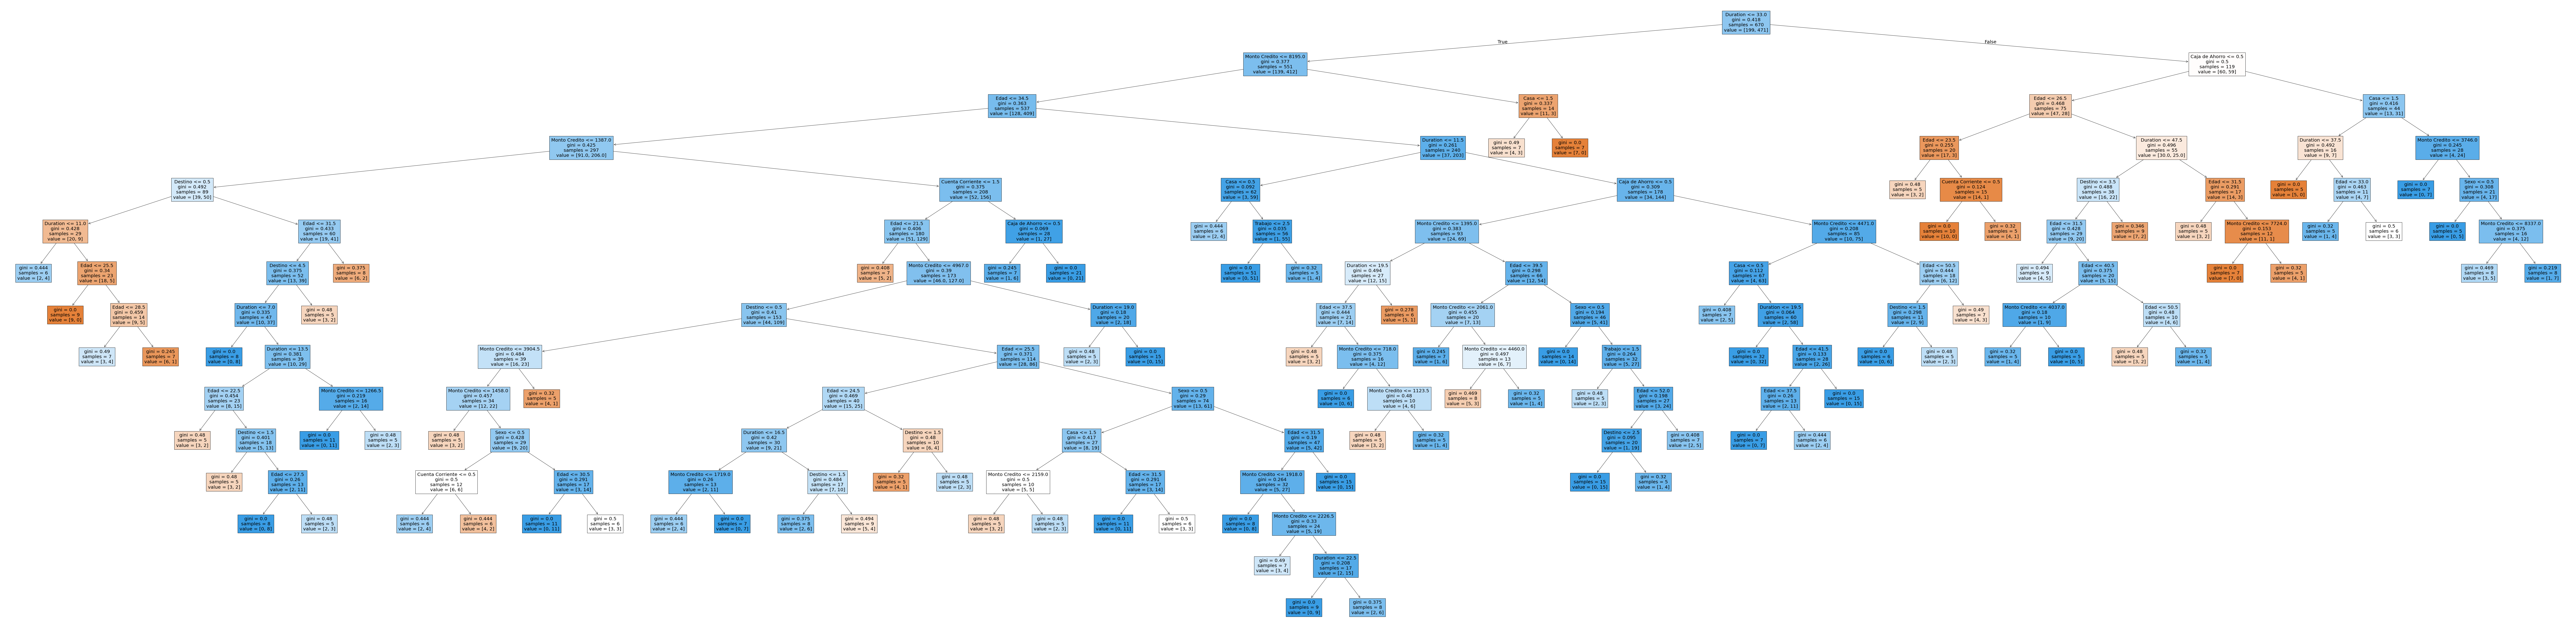

In [53]:
from sklearn.tree import plot_tree

# Graficar el árbol
plt.figure(figsize=(200, 50))  # Tamaño de la figura

plot_tree(tree,filled=True, feature_names=X_train.columns)
plt.show()

In [54]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print("\nMatriz de confusión:\n", cm)



Accuracy: 0.6484848484848484
Recall: 0.7685589519650655
AUC: 0.5723982878637208

Matriz de confusión:
 [[ 38  63]
 [ 53 176]]


<div class="alert alert-warning">En el contexto de análisis y gestión del riesgo crediticio, el modelo de regresión logística es claramente superior y más adecuado por las siguientes razones:
    
- Mayor recall (0.94) → Detecta más clientes morosos, reduciendo pérdidas esperadas.
- Mayor AUC (0.68) → Discrimina mejor entre buenos y malos pagadores.

</div>

## ❑ Random Forest (Bosques Aleatorios)

In [55]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Riesgo"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Riesgo"], axis=1) # Aplico que X sean todas las columnas menos la del objetivo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [57]:
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.7121212121212122


In [58]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [59]:
predictions=classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, predictions)
print(cm)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 27  74]
 [ 21 208]]
              precision    recall  f1-score   support

           0       0.56      0.27      0.36       101
           1       0.74      0.91      0.81       229

    accuracy                           0.71       330
   macro avg       0.65      0.59      0.59       330
weighted avg       0.68      0.71      0.68       330

0.7121212121212122


<div class="alert alert-warning">Su matriz de confusión muestra mejor equilibrio porque hay menos falsos negativos [FN] que el árbol y
menos falsos positivos [FP] que la regresión logística. Discrimina mejor, el modelo es mas robusto que un arbol de decisión y mas generalizable pero
es menos interpretable, por lo que sigue siendo la regresión logistica lo recomendado a utilizar.</div>

## ❑ XGBoost

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop(["Riesgo"], axis=1)   # Excluimos Riesgo.
y = df["Riesgo"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [62]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
        eval_metric="auc"
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_prob))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

AUC: 0.6816931216931217

Matriz de confusión:
 [[ 37  53]
 [ 25 185]]

               precision    recall  f1-score   support

           0       0.60      0.41      0.49        90
           1       0.78      0.88      0.83       210

    accuracy                           0.74       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



<div class="alert alert-warning">El modelo XGBoost mejora la eficiencia comercial. Pero tiene más falsos negativos que la regresión por lo que aumenta el riesgo de incobrabilidad. Nuevamente si se quiere minimizar el riesgo (evitar impagos), la Regresión Logística sera el modelo a utilizar</div>

#### Análisis comparativo
| **Regresión Logística** | **Árbol de Decisión** | **Random Forest** | **XGBoost** |
|:--:|:--:|:--:|:--:|
| <pre>[ 20  70 ]<br>[ 13 197 ]</pre> | <pre>[ 38  63 ]<br>[ 53 176 ]</pre> | <pre>[ 27  74 ]<br>[ 21 208 ]</pre> | <pre>[ 37  53 ]<br>[ 25 185 ]</pre> |
---
Interpretación general

| Modelo | Accuracy | Recall | AUC | Comentario |
|:--|:--:|:--:|:--:|:--|
| **Regresión Logística** | 0.72 | **0.94** | **0.68** | Detecta casi todos los clientes de alto riesgo, aunque rechaza más clientes buenos (modelo conservador). |
| **Árbol de Decisión** | 0.65 | 0.77 | 0.57 | Más equilibrado pero con bajo poder predictivo; deja pasar muchos riesgos. |
| **Random Forest** | 0.72 | 0.91 | **0.68** | Buen equilibrio entre recall y precisión; mejora la estabilidad frente al árbol simple. |
| **XGBoost** | **0.74** | 0.88 | **0.68** | Buen equilibrio entre detectar clientes de riesgo y no rechazar clientes buenos; pierde algunos incumplimientos respecto a logística. |


## ❑ REGRESION LOGISTICA - Continuación - Calculo [PD] Probability of Default

In [64]:
# Calcular la probabilidad de incumplimiento, lr (modelo ya entrenado), saca la probabilidad de cada valor dando el porcentaje que...
# corresponde tanto si es "bueno" o "malo" por ejemplo 0,25 y 0.75, el codigo pide el del "malo" que seria el incumplimiento.
pd_pred = lr.predict_proba(X_test)[:, 1]

# Ejemplo: mostrar primeras 30 predicciones
pd_pred[:30]


array([0.70742067, 0.5479523 , 0.765016  , 0.50276388, 0.37650546,
       0.59039467, 0.40728132, 0.29748446, 0.75560523, 0.4853175 ,
       0.70107073, 0.853014  , 0.39679835, 0.77427743, 0.47599998,
       0.45325166, 0.68445638, 0.36536544, 0.5828843 , 0.30812405,
       0.55920128, 0.40476754, 0.35095039, 0.54026632, 0.27538303,
       0.44649696, 0.17771844, 0.41499409, 0.69709284, 0.91665825])

In [65]:
X_test['PD'] = pd_pred # Agrego la columna PD con los porcentajes de default.
X_test['Riesgo'] = pd.cut(pd_pred, bins=[0, 0.2, 0.5, 1], labels=['Bajo', 'Medio', 'Alto']) # Clasifica los riesgos.
X_test[['PD','Riesgo']].head(7)

,PD,Riesgo
80,0.707421,Alto
157,0.547952,Alto
65,0.765016,Alto
489,0.502764,Alto
804,0.376505,Medio
696,0.590395,Alto
122,0.407281,Medio


In [66]:
X_test.head(7) # Visto como queda todo ese dataframe.

,Edad,Sexo,Trabajo,Casa,Caja de Ahorro,Cuenta Corriente,Monto Credito,Duration,Destino,PD,Riesgo
80,44,0,2,2,2,2,5943,24,2,0.707421,Alto
157,45,1,1,2,0,0,339,12,5,0.547952,Alto
65,48,1,2,2,2,2,5190,27,3,0.765016,Alto
489,26,1,2,1,0,0,3518,6,0,0.502764,Alto
804,24,0,0,1,1,1,7472,12,0,0.376505,Medio
696,29,1,2,2,0,1,1103,12,2,0.590395,Alto
122,24,1,1,1,0,0,1768,12,1,0.407281,Medio


In [67]:
# Como no tengo los datos en el dataset, este es un ejemplo de creación de un dataframe nuevo que simulara saldos y límites de crédito.
np.random.seed(42)
n = len(pd_pred)  # número de observaciones (mismo que los calculados en PD)

df_calculo = pd.DataFrame({
    'PD': pd_pred,
    # Ejemplos de exposición: saldo actual y límite de crédito (valores ficticios)
    'saldo_actual': np.random.uniform(1000, 50000, size=n).astype(int),   # saldo en pesos
    'limite': np.random.uniform(5000, 100000, size=n).astype(int)        # límite de crédito
})

In [68]:
df_calculo.sample(7)

,PD,saldo_actual,limite
158,0.551954,12644,10348
269,0.454082,15386,38084
291,0.776973,2830,65883
272,0.593551,43486,42671
161,0.685531,31982,66674
157,0.761281,38319,49522
128,0.643841,1340,38336


## ❑ Calculo [LGD] Loss Given Default

En la práctica, la estimación del parámetro LGD (Loss Given Default) depende de la disponibilidad de información histórica sobre recuperaciones.
Dado que en este caso no se cuenta con dichos datos, y con el fin de simplificar el cálculo, se asume un LGD constante del 45% (esto reemplaza a los valores de la fórmula).

Esto implica que, en promedio, si un cliente incurre en default, el banco espera recuperar el 55% de la exposición crediticia y perder el 45% restante.
En otras palabras, por cada 100 de saldo en mora, la pérdida esperada asciende a 45.

La fórmula de calculo: $$ 𝐿𝐺𝐷 = 1−\frac{Recuperaciones Netas} {EAD}$$ 

In [69]:
LGD_constante = 0.45 # Defino la constante.
df_calculo['LGD'] = LGD_constante # Agrego al dataframe ultimo creado la columna LGD con ese porcentaje.

In [70]:
df_calculo.sample(7)

,PD,saldo_actual,limite,LGD
135,0.438450,16836,71592,0.45
67,0.302010,40307,91008,0.45
236,0.387289,14757,85716,0.45
267,0.170262,35421,46560,0.45
240,0.278589,47082,95634,0.45
27,0.414994,26197,63113,0.45
12,0.396798,41789,7408,0.45


## ❑ Calculo [EAD] Exposure at Default

Representa cuánto dinero estaría en riesgo si el cliente no paga. La fórmula:

$$ EAD = \text{Monto otorgado} \times \text{Factor de utilización} $$

Como el ejemplo en la primera página, la línea aprobada 100.000, utilizado 60.000. Se estima que al default usará un 50% [CCF] de lo no utilizado.

$$ 𝐸𝐴𝐷=60.000+0,5×40.000=80.000$$

In [71]:
CCF = 0.75 # El 75% de la parte no utilizada del crédito podría usarse antes del default
df_calculo['EAD'] = df_calculo['saldo_actual'] + (df_calculo['limite'] - df_calculo['saldo_actual']).clip(lower=0) * CCF

In [72]:
df_calculo.head()

,PD,saldo_actual,limite,LGD,EAD
0,0.707421,19352,9909,0.45,19352.00
1,0.547952,47585,55478,0.45,53504.75
2,0.765016,36867,56360,0.45,51486.75
3,0.502764,30334,65555,0.45,56749.75
4,0.376505,8644,73978,0.45,57644.50


## ❑ Calculo [EL] Expected Loss

Recordando la fórmula: $$ 𝐸L = PD × LGD × EAD $$

In [73]:
# Agrego al nuevo dataframe la columna EL que sera igual a la multiplicación de PDxLGDxEAD.
df_calculo['EL'] = df_calculo['PD'] * df_calculo['EAD'] * df_calculo['LGD']

In [74]:
df_calculo.head(10) # 10 primeros ejemplos.

,PD,saldo_actual,limite,LGD,EAD,EL
0,0.707421,19352,9909,0.45,19352.00,6160.502173
1,0.547952,47585,55478,0.45,53504.75,13193.122767
2,0.765016,36867,56360,0.45,51486.75,17724.684390
3,0.502764,30334,65555,0.45,56749.75,12839.276134
4,0.376505,8644,73978,0.45,57644.50,9766.561029
5,0.590395,8643,97705,0.45,75439.50,20042.585483
6,0.407281,3846,54048,0.45,41497.50,7605.520498
7,0.297484,43442,35680,0.45,43442.00,5815.493906
8,0.755605,30454,80542,0.45,68020.00,23128.320381
9,0.485318,35695,30729,0.45,35695.00,7795.533729


In [75]:
el_total = df_calculo['EL'].sum().astype(int)

In [76]:
print("La perdida esperada total de la cartera de clientes es", el_total)

La perdida esperada total de la cartera de clientes es 3598413


In [77]:
el_promedio = df_calculo['EL'].mean().astype(int)
print("La perdida esperada promedio por cliente", el_promedio)

La perdida esperada promedio por cliente 11994


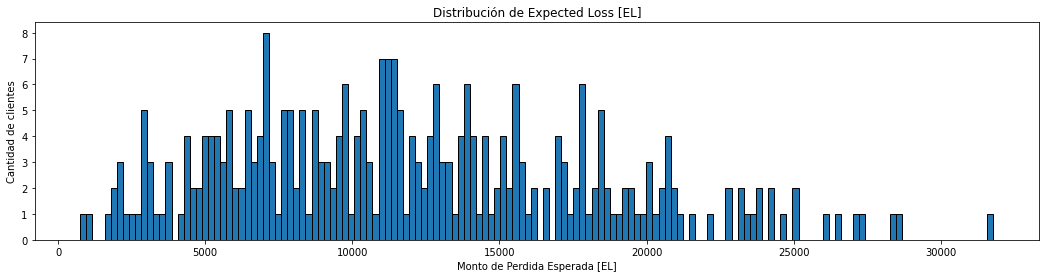

In [78]:
df_calculo['EL'].hist(bins=150, figsize=(18,4), edgecolor='k', grid=False)
plt.title("Distribución de Expected Loss [EL]")
plt.xlabel("Monto de Perdida Esperada [EL]")
plt.ylabel("Cantidad de clientes")
plt.show()


<div class="alert alert-warning">En conclución viendo el grafico de distribución de [EL] Expected Loss - Perdida Esperada, los valores bajos en los montos son corresponden a clientes que casi no generan riesgo monetario por tener justamente esos montos bajos, al contrario valores altos son de clientes con mayor exposición y/o probabilidad de default. Entonces si las barras más altas están a la izquierda, significa que la mayoría de los clientes tiene pérdidas esperadas bajas. Barras a la derecha muestran los clientes que generan pérdidas más grandes, aunque sean pocos.</div>

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Análisis crediticio y gestión del riesgo de crédito

---